## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

### Cargar los datos

Abrir el archivo `diabetes.csv` en la carpeta `1_datos`. Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset?
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes o mal registrados en algún atributo?
*   ¿Qué tipo de dato tiene cada atributo?

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
# Cargamos los datos
data = pd.read_csv('1_datos/diabetes.csv')

data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


Traduccion de las variables

        Pregnancies ---> Embarazos  
        Glucose ---> Glucosa  
        BloodPressure ---> Presión arterial  
        SkinThickness ---> Grosor de la piel  
        Insulin ---> Insulina  
        BMI ---> IMC  
        DiabetesPedigreeFunction ---> Función del pedigrí de la diabetes  
        Age ---> Edad  
        Outcome ---> Resultado  

In [44]:
# Respondemos las preguntas
print(f'El dataset tiene {data.shape[0]} instancias')
print(f'La variable target es {data.columns[-1]} y es de tipo {data.dtypes.iloc[-1]}, siendo binaria')
print(f'El conjunto de datos tiene un total de {data.shape[1]} atributos')
print(f'En total hay {data.isnull().sum().sum()} valores nulos en las diferentes variables')
print(f'Los tipos de datos son: {data.dtypes}')

El dataset tiene 768 instancias
La variable target es Outcome y es de tipo int64, siendo binaria
El conjunto de datos tiene un total de 10 atributos
En total hay 19 valores nulos en las diferentes variables
Los tipos de datos son: Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [45]:
data.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,767.000000,756.000000,763.000000,767.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.195567,20.862434,80.322412,32.034289,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.206609,15.865314,115.439459,7.804050,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,128.500000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             767 non-null    float64
 4   SkinThickness             756 non-null    float64
 5   Insulin                   763 non-null    float64
 6   BMI                       767 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 60.1 KB


### Detección de valores atípicos y tratamiento de datos faltantes

- Analice con cuidado el rango de valores de los atributos. **¿Nota valores atípicos a simple vista en algún/algunos de los atributos?**

    -  Ejemplo: Un valor de insulina igual a 0 puede considerarse mal registrado o faltante.

- Los valores atípicos que detecte pueden considerarse datos faltantes. Utilice el método [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) de pandas para reemplazarlos por np.NaN.

Después de realizar el reemplazo, ¿Cuántos datos faltantes presenta cada atributo?

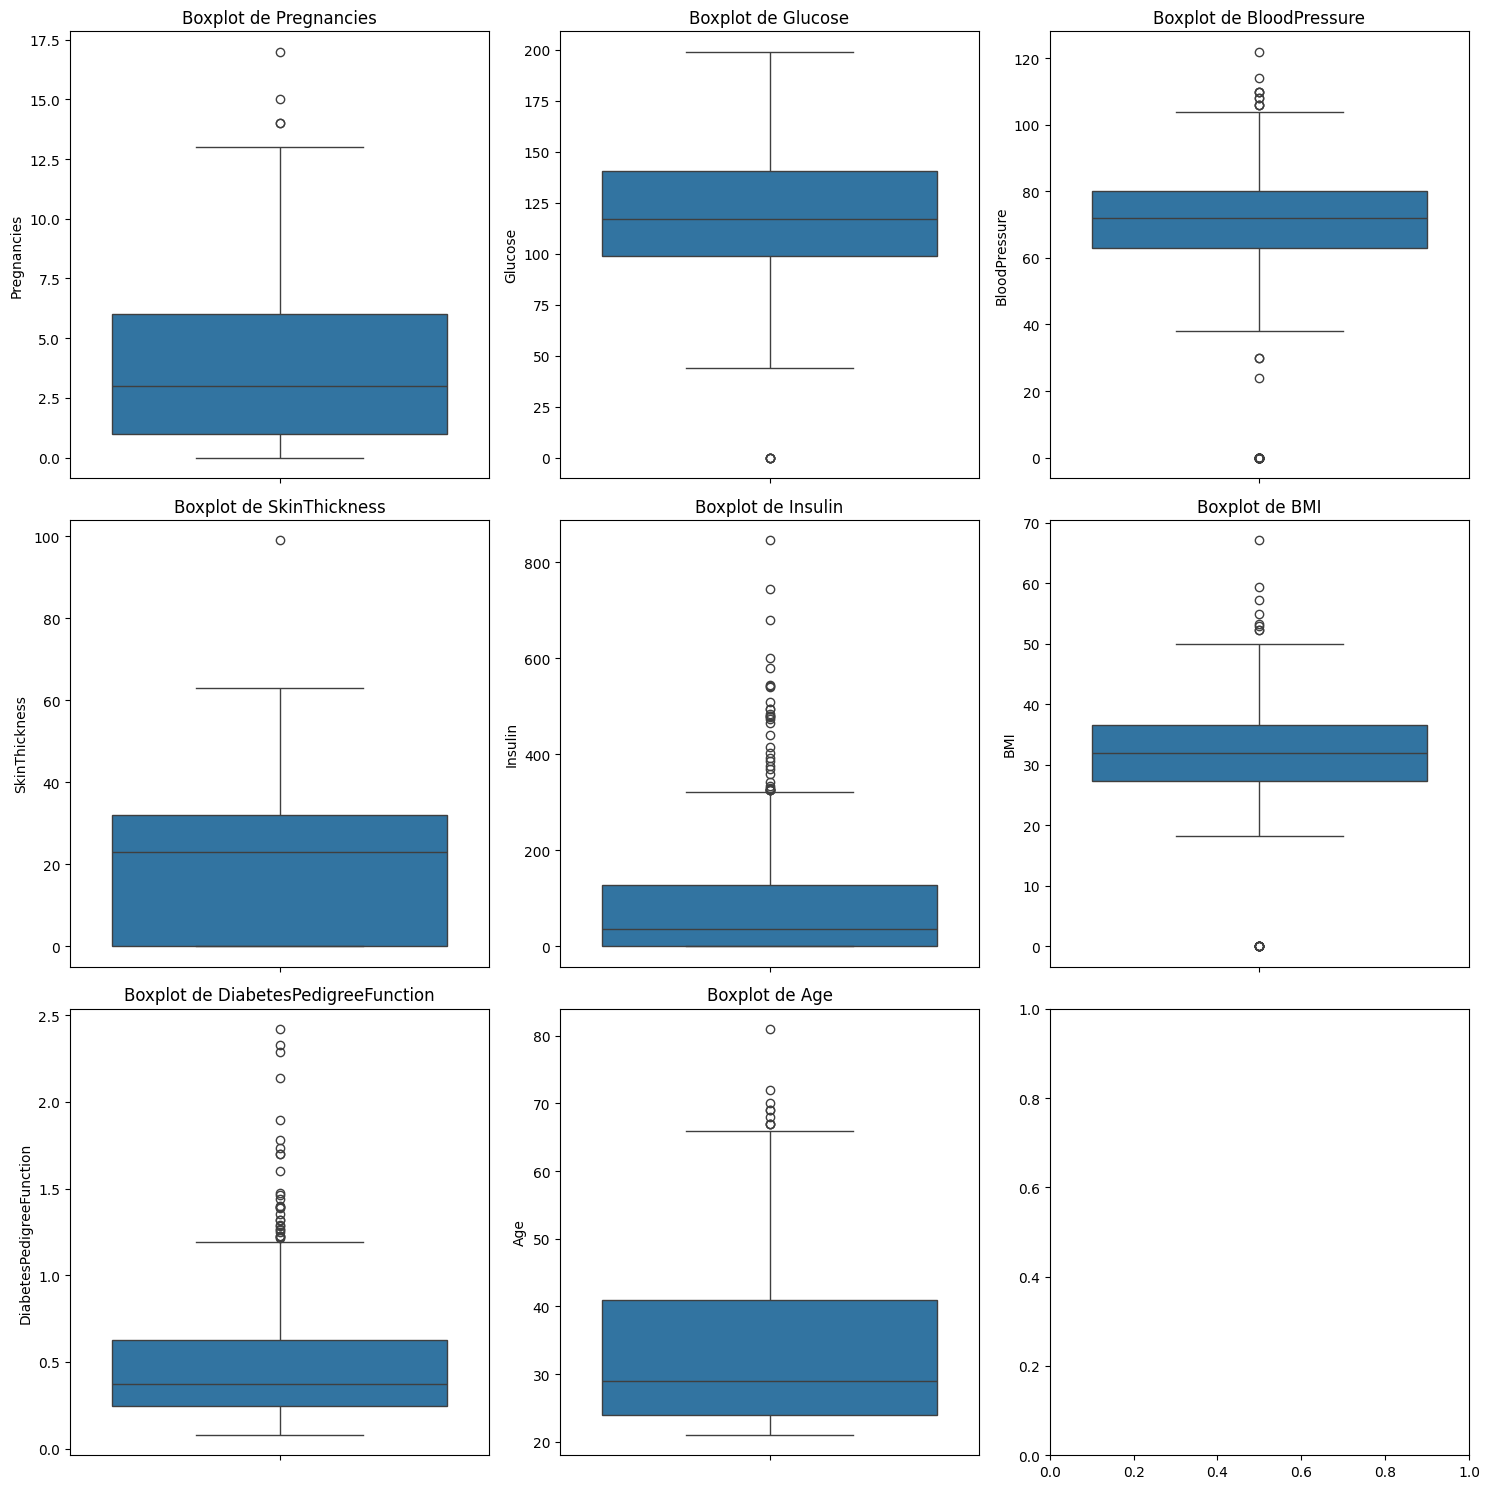

In [47]:
# Verificamos si hay valores outliers para las diferentes variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Lista de columnas a graficar
columns = data.columns[1:-1]  # Excluyendo 'Unnamed: 0' y 'Outcome'

# Generar los boxplots
for i, column in enumerate(columns):
    row, col = divmod(i, 3)
    sns.boxplot(data=data, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {column}')

# Ajustar el layout
plt.tight_layout()
plt.show()

C:\Users\Laura\AppData\Local\Temp\ipykernel_8312\3772315822.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].replace(0, np.nan, inplace=True)
C:\Users\Laura\AppData\Local\Temp\ipykernel_8312\3772315822.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

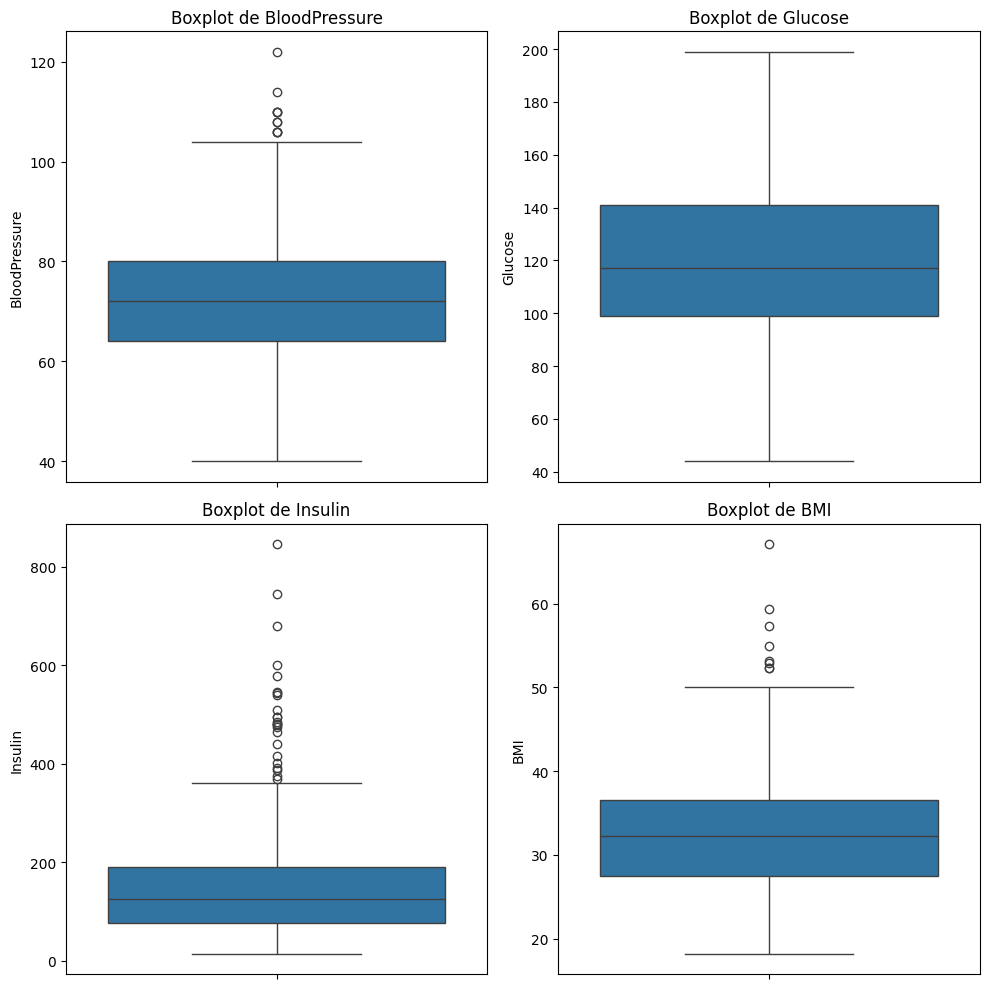

In [48]:
# Reemplazar el valor 0 en la columna 'Glucose' por NaN
data['Glucose'].replace(0, np.nan, inplace=True)

# Reemplaza los valores menores a 40 en 'BloodPressure' por NaN
data.loc[data['BloodPressure'] < 40, 'BloodPressure'] = np.nan

# Reemplazar el valor 0 en la columna 'Insulin' por NaN
data['Insulin'].replace(0, np.nan, inplace=True)

# Reemplazar el valor 0 en la columna 'BMI' por NaN
data['BMI'].replace(0, np.nan, inplace=True)

# Definir el tamaño de la figura
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Lista de columnas a graficar
columnas_grafico = ['BloodPressure', 'Glucose', 'Insulin', 'BMI']

# Generar los boxplots
for i, column in enumerate(columnas_grafico):
    row, col = divmod(i, 2)
    sns.boxplot(data=data, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {column}')

# Ajustar el layout
plt.tight_layout()
plt.show()

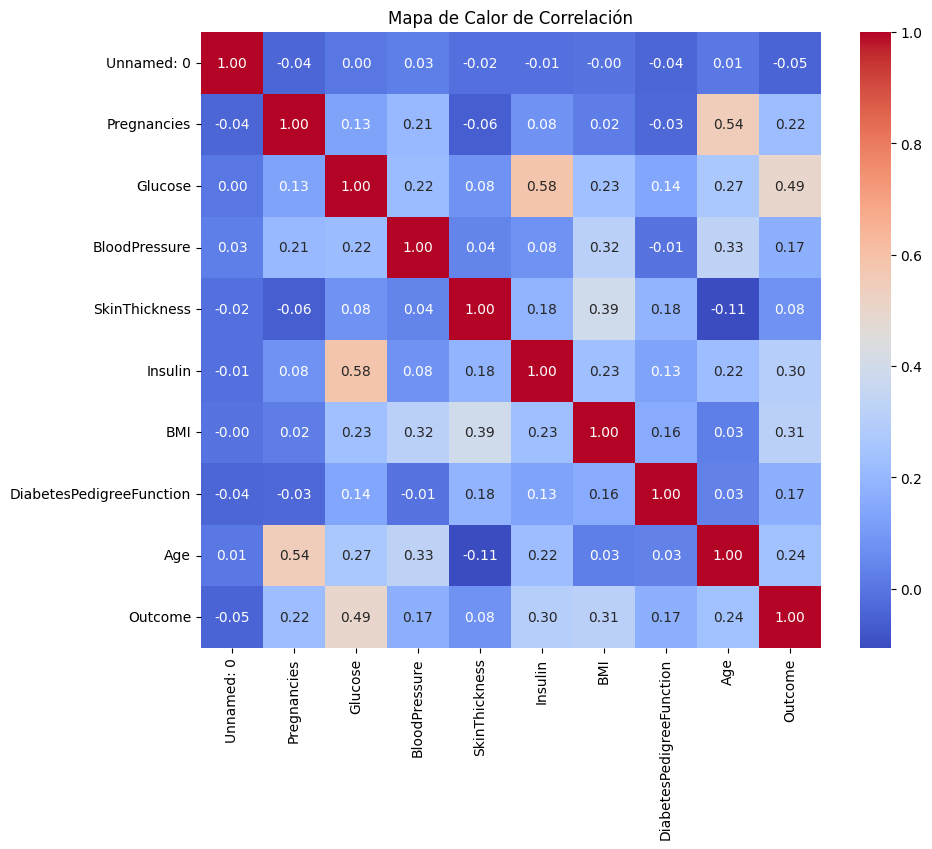

In [49]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [50]:
# Nos fijamos los valores nulos en cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   763 non-null    float64
 3   BloodPressure             729 non-null    float64
 4   SkinThickness             756 non-null    float64
 5   Insulin                   394 non-null    float64
 6   BMI                       757 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 60.1 KB


### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba. Divida el conjunto de datos en entrenamiento y prueba utilizando train_test_split (con una proporción de 80% entrenamiento y 20% prueba) use 42 como semilla.

In [51]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Aclaración sobre la imputación de datos faltantes
Algo a tener en cuenta al momento de imputar datos faltantes es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/sin diabetes). Por ejemplo, una persona sana tendrá un valor de insulina en un rango distinto a una persona con diabetes.

- Implemente un transformer para imputar datos faltantes de forma condicional, dependiendo de la clase (diabetes/no diabetes). Para hacerlo, utilice la media o mediana correspondiente a cada clase.
- Utilice un Pipeline de scikit-learn para realizar la preparación completa de los datos, que incluya la imputación.

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ConditionalImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputers = {}

    def fit(self, X, y=None):
        self.y = y  # Guarda y como atributo para usar en transform
        for outcome in y.unique():
            self.imputers[outcome] = {}
            for column in X.columns:
                mean_value = X.loc[y == outcome, column].mean()
                if column != 'DiabetesPedigreeFunction':
                    mean_value = int(mean_value)
                self.imputers[outcome][column] = mean_value

    def mostrar(self):
        df_imputer = pd.DataFrame(self.imputers).T
        print(df_imputer)

    def transform(self, X):
        X_transformed = X.copy()
        for column in X.columns:
            for outcome, value in self.imputers.items():
                X_transformed.loc[X_transformed[column].isna() & (y == outcome), column] = value[column]
        return X_transformed

In [53]:
# Crear el pipeline con el imputador condicional
pipeline = Pipeline(steps=[
    ('conditional_imputer', ConditionalImputer())
])

# Ajustar el imputador en el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Transformar tanto el conjunto de entrenamiento como el de testeo usando la media del entrenamiento
X_train_imputed = pipeline.transform(X_train)
X_test_imputed = pipeline.transform(X_test)

# Convertir a DataFrames para mantener los nombres de las columnas
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [54]:
pipeline.named_steps['conditional_imputer'].mostrar()

   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0       392.0          3.0    111.0           71.0           19.0    131.0   
1       371.0          4.0    142.0           75.0           22.0    204.0   

    BMI  DiabetesPedigreeFunction   Age  
0  30.0                  0.431254  30.0  
1  35.0                  0.540545  37.0  


In [55]:
# Verificación de la imputación
print(X_train_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    float64
 3   BloodPressure             614 non-null    float64
 4   SkinThickness             614 non-null    float64
 5   Insulin                   614 non-null    float64
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 64.1 KB
None


In [56]:
print(X_test_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 668 to 462
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                154 non-null    int64  
 1   Pregnancies               154 non-null    int64  
 2   Glucose                   154 non-null    float64
 3   BloodPressure             154 non-null    float64
 4   SkinThickness             154 non-null    float64
 5   Insulin                   154 non-null    float64
 6   BMI                       154 non-null    float64
 7   DiabetesPedigreeFunction  154 non-null    float64
 8   Age                       154 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 16.1 KB
None



- Entrene al menos tres clasificadores distintos.
- Compare el desempeño de los modelos utilizando la métrica F1-score, ya que el dataset tiene un desbalance de clases (más casos sin diabetes que con diabetes). Puede evaluar otras métricas si lo desea. [sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)